# Clase 1 Platzi, análisis exploratorio de datos, conociendo datos de pingüinos

## Instalar lirbrerías necesarias

In [ ]:
# crear ambiente para analisis de datos
!conda create -n data_analisis

# activar ambiente creado
!conda activate data_analisis

# instalar librerias con pip
!pip install palmerpenguins numpy pandas seaborn matplotlib empiricaldist statsmodels sklearn pyjanitor

## Importar librerías

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss


## Establecer apariencia general de los gráficos

In [2]:
%matplotlib inline
sns.set_style(style ='whitegrid')
sns.set_context(context= 'notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelite':'#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete palmerpenguis

#### Datos crudos

In [3]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df.head()


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


#### Datos previamente procesados

In [4]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


#### Utilizando los conjuntos de datos de seaborn

In [5]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Colecta y validación de datos

### ¿Qué tipo de dato son las variables del conjunto de datos?

In [6]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [7]:
(
    preprocess_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
Name: count, dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [8]:
preprocess_penguins_df.shape

(344, 8)

### ¿Existen valores nulos explícitos en el conjunto de datos?

In [9]:
(
    preprocess_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

### De tener observaciones con valores nulos, ¿Cuántas tenemos por cada variable?

In [10]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [11]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

### ¿Cuál es la proporción de valores nulos por cada variable?

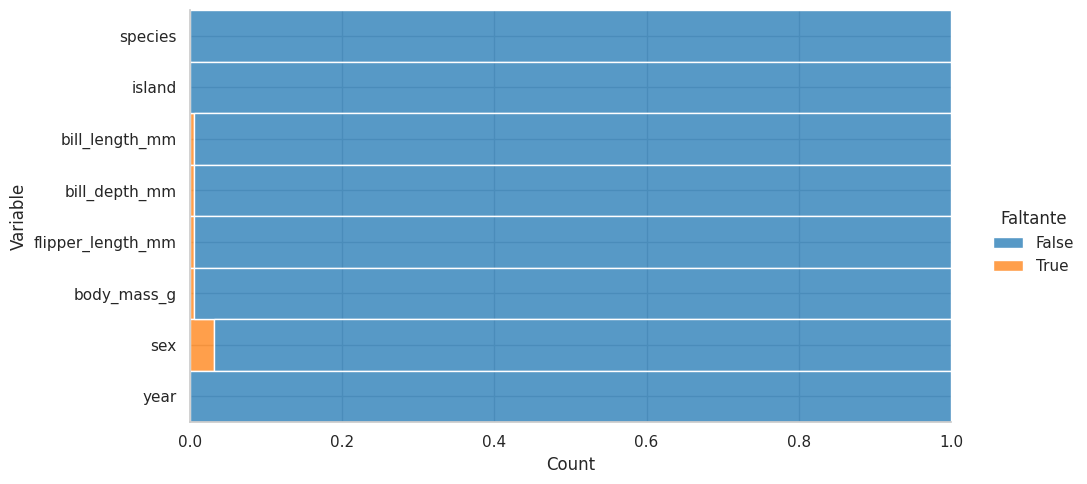

In [12]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data=df.rename(columns={'variable': 'Variable', 'value':'Faltante'}),
                y='Variable',
                hue='Faltante',
                multiple='fill',
                aspect=2.0,
            )
        )
    )
)

### ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

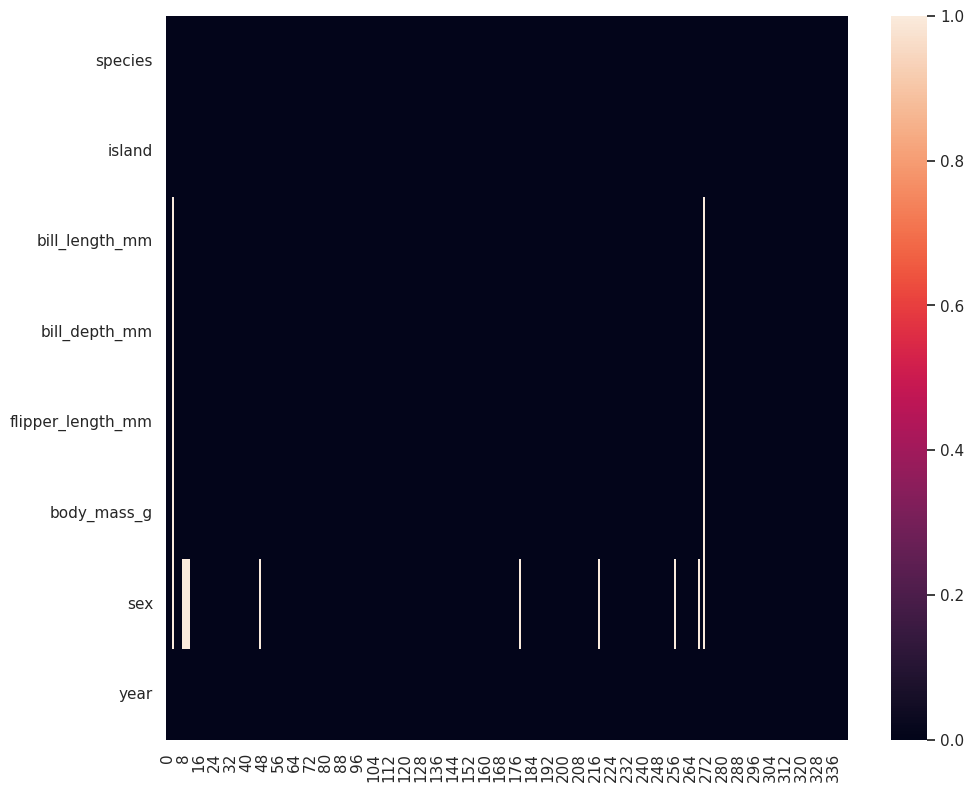

In [13]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df:(
            sns.heatmap(
                data=df        
            )
        )
    )
)

### ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [14]:
print('La matriz es de '+ str(preprocess_penguins_df.shape) + ' antes de eliminar los valores nulos')

processed_penguins_df = (
    preprocess_penguins_df
    .dropna()
)

print('La matriz es de '+ str(processed_penguins_df.shape) + ' después de eliminar los valores nulos')
print('Se están eliminando: '+ str(preprocess_penguins_df.shape[0] - processed_penguins_df.shape[0]) +' filas o registros')

La matriz es de (344, 8) antes de eliminar los valores nulos
La matriz es de (333, 8) después de eliminar los valores nulos
Se están eliminando: 11 filas o registros
